<a href="https://colab.research.google.com/github/Kiarendil/ML_FIAN2020_hometasks/blob/master/MLatFIAN2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [1]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv

--2020-10-04 17:29:47--  https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv [following]
--2020-10-04 17:29:48--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2020-10-04 17:29:48 (2.12 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1

In [3]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data.loc[(data['Pclass'] == 1)]['Survived'].mean()

0.6296296296296297

In [4]:
data.loc[(data['Pclass'] == 2)]['Survived'].mean()

0.47282608695652173

In [5]:
data.loc[(data['Pclass'] == 3)]['Survived'].mean()

0.24236252545824846

In [6]:
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Task 2

In [7]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
sib_max = np.max(data['SibSp'])
avarage_parents = []

for sib_count in range(0, sib_max + 1):
  print(sib_count)
  av_pr = data.loc[(data['SibSp'] == sib_count)]['Parch'].mean()
  if math.isnan(av_pr):
    av_pr = 0
  print(av_pr)
  avarage_parents.append(av_pr)

0
0.18585526315789475
1
0.6555023923444976
2
0.6428571428571429
3
1.3125
4
1.5
5
2.0
6
0
7
0
8
2.0


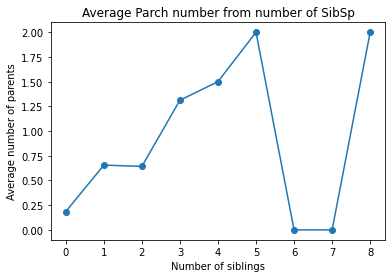

In [9]:
plt.scatter([i for i in range(0, sib_max + 1)], avarage_parents)
plt.plot([i for i in range(0, sib_max + 1)], avarage_parents)

plt.title("Average Parch number from number of SibSp")
plt.xlabel("Number of siblings")
plt.ylabel("Average number of parents");

plt.show()

In [10]:
g = data.groupby('SibSp').Parch.mean()
g

SibSp
0    0.185855
1    0.655502
2    0.642857
3    1.312500
4    1.500000
5    2.000000
8    2.000000
Name: Parch, dtype: float64

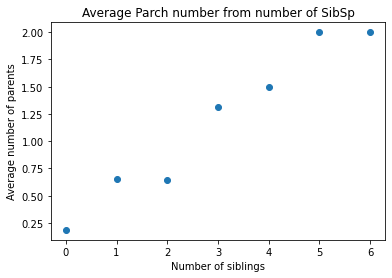

In [11]:
plt.scatter([i for i in range(len(g))], g.values)

plt.title("Average Parch number from number of SibSp")
plt.xlabel("Number of siblings")
plt.ylabel("Average number of parents");

plt.show()

## Task 3

In [19]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def feature_selection_and_preprocessing(dataset):
  features = dataset[["Fare", "SibSp"]].copy()
  new_f = scaler.fit_transform(features)
  return features

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.79


In [13]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[["Fare", "SibSp"]].copy()
  features -= features.mean() 
  features /= features.std()
  return features

model = KNeighborsClassifier(
#     # <YOUR CODE>
#     # E.g.
    n_neighbors=77
)

# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
a = accuracy_score(
    data_test['Survived'],
    test_predictions
)
print("Test accuracy:", a)

Test accuracy: 0.76


In [49]:
a_list = []

for i in range(1, 101):
  def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
    features = dataset[["Fare", "Pclass"]].copy()
    features -= features.mean() 
    features /= features.std()
    return features

  model = KNeighborsClassifier(
  #     # <YOUR CODE>
  #     # E.g.
      n_neighbors=i
  )

  # Validation code (do not touch)
  data = pd.read_csv("train.csv", index_col='PassengerId')
  data_train = data.iloc[:-100]
  data_test = data.iloc[-100:]

  model.fit(
      feature_selection_and_preprocessing(
          data_train.drop('Survived', axis=1)
      ),
      data_train['Survived']
  )

  test_predictions = model.predict(
      feature_selection_and_preprocessing(
          data_test.drop('Survived', axis=1)
      )
  )
  a = accuracy_score(
      data_test['Survived'],
      test_predictions
  )
  a_list.append(a)
  if a >= 0.75:
    print(f'i={i}, a={a}')
  # print("Test accuracy:", a)

i=11, a=0.75
i=13, a=0.75
i=33, a=0.75
i=35, a=0.75
i=41, a=0.75
i=42, a=0.75
i=49, a=0.76
i=51, a=0.76
i=55, a=0.76
i=56, a=0.76
i=57, a=0.76
i=58, a=0.76
i=59, a=0.77
i=60, a=0.76
i=61, a=0.76
i=62, a=0.76
i=63, a=0.76
i=64, a=0.76
i=67, a=0.75
i=71, a=0.77
i=72, a=0.76
i=73, a=0.77
i=74, a=0.76
i=77, a=0.77
i=78, a=0.77
i=79, a=0.77
i=81, a=0.77
i=82, a=0.77
i=83, a=0.77
i=84, a=0.77
i=85, a=0.77
i=86, a=0.77
i=87, a=0.77
i=88, a=0.77
i=89, a=0.8
i=90, a=0.8
i=91, a=0.8
i=92, a=0.75
i=93, a=0.75
i=97, a=0.8
i=98, a=0.8
i=99, a=0.8
i=100, a=0.78


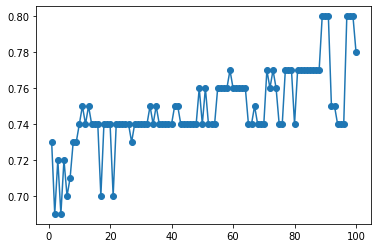

In [15]:
plt.scatter([i for i in range(1, 101)], a_list)
plt.plot([i for i in range(1, 101)], a_list)

plt.show()

So here provided two alternative soulutions: 

1) With `StandardScaler` function 
2) With handmade scaling 

Loop over `n_neighbors` provides some optimal numbers for accuracy

## Task 4

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [73]:
from sklearn.model_selection import train_test_split
from tqdm import trange, tqdm

data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=100)

In [81]:
  model = KNeighborsClassifier(n_neighbors=99)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1))
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.74


In [86]:
test_error_list = []

for i in trange(5000):
  data = pd.read_csv("train.csv", index_col='PassengerId')
  data_train, data_test = train_test_split(data, test_size=100)

  model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)),
    data_train['Survived']
  )

  test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1))
  )
  test_error_list.append(accuracy_score(data_test['Survived'], test_predictions))

100%|██████████| 5000/5000 [01:54<00:00, 43.74it/s]


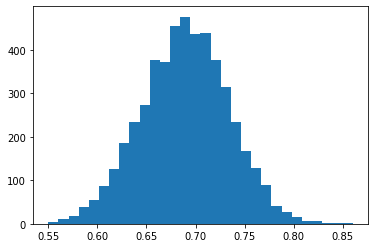

mean accuracy =  0.69


In [89]:
Nbin = int(round((np.max(test_error_list) - np.min(test_error_list)) / 0.01))
bins = np.linspace(np.min(test_error_list), np.max(test_error_list), Nbin)
plt.hist(test_error_list, bins=bins)
plt.show()

print('mean accuracy = ', round(np.mean(test_error_list), 2))

So, resulting mean accuracy is significantly less than the one obtained ('tuned') on a specific set